In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np
import scanpy as sc
#import os
#import glob
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_230724_PETRI'

In [4]:
expr = pd.read_csv("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_230724_PETRI/evo1234r_cluster_sum.csv",index_col=0).T
expr = expr[['L','M','S']]
expr

,L,M,S
dnaA,13218.0,1821.0,272.0
dnaN,13748.0,1915.0,248.0
SAUSA300_RS00020,967.0,121.0,19.0
recF,8933.0,1235.0,217.0
gyrB,28122.0,4231.0,443.0
...,...,...,...
SAUSA300_RS15740,57.0,9.0,0.0
SAUSA300_RS15795,320.0,64.0,26.0
SAUSA300_RS15885,1.0,1.0,35.0
SAUSA300_RS15905,247.0,29.0,2.0


In [5]:
metadata = pd.DataFrame({'condition': ['L','M','S']},
                       index=['L','M','S'])
metadata

,condition
L,L
M,M
S,S


In [6]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=expr.transpose(),
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
    # n_cpus=8, # n_cpus can be specified here or in the inference object
)
dds

AnnData object with n_obs × n_vars = 3 × 2566
    obs: 'condition'
    obsm: 'design_matrix'

In [7]:
dds.fit_size_factors()

dds.obsm["size_factors"]

Fitting size factors...
... done in 0.01 seconds.



array([5.9023277, 0.8067185, 0.2093924])

In [8]:
dds.deseq2() #It's able to get the size factor and normalized counts although with an error

Fitting size factors...
... done in 0.00 seconds.



ValueError: The number of samples and the number of design variables are equal, i.e., there are no replicates to estimate the dispersion. Please use a design with fewer variables.

In [9]:
dds

AnnData object with n_obs × n_vars = 3 × 2566
    obs: 'condition'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero'
    layers: 'normed_counts'

In [10]:
exp = pd.DataFrame(dds.layers['normed_counts'], 
                    index=['L','M','S'],
                      columns=expr.index)
exp

,dnaA,dnaN,SAUSA300_RS00020,recF,gyrB,gyrA,nnrD,hutH,serS,SAUSA300_RS00055,...,SAUSA300_RS15580,SAUSA300_RS15635,SAUSA300_RS15665,SAUSA300_RS15725,SAUSA300_RS15735,SAUSA300_RS15740,SAUSA300_RS15795,SAUSA300_RS15885,SAUSA300_RS15905,SAUSA300_RS15910
L,2239.455461,2329.250543,163.833669,1513.470694,4764.560937,5819.907288,148.246598,84.712342,1254.081504,43.542144,...,5.929864,15.756496,6.268713,12.368002,14.570523,9.657207,54.215899,0.169425,41.847897,4.743891
M,2257.292972,2373.814411,149.990362,1530.893367,5244.704320,6362.814293,179.740517,75.614976,1514.778700,37.187693,...,13.635487,29.750154,4.958359,6.197949,9.916718,11.156308,79.333745,1.239590,35.948103,4.958359
S,1298.996532,1184.379191,90.738728,1036.331792,2115.645087,2316.225434,797.545665,219.683237,577.862428,57.308671,...,85.963006,133.720231,14.327168,19.102890,9.551445,0.000000,124.168786,167.150289,9.551445,0.000000


In [11]:
pwd

'/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_230724_PETRI'

In [12]:
exp.to_csv("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_230724_PETRI/evo1234r_deseq2_cluster.csv")

In [13]:
exp = pd.read_csv("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_230724_PETRI/evo1234r_deseq2_cluster.csv", index_col=0)
exp

,dnaA,dnaN,SAUSA300_RS00020,recF,gyrB,gyrA,nnrD,hutH,serS,SAUSA300_RS00055,...,SAUSA300_RS15580,SAUSA300_RS15635,SAUSA300_RS15665,SAUSA300_RS15725,SAUSA300_RS15735,SAUSA300_RS15740,SAUSA300_RS15795,SAUSA300_RS15885,SAUSA300_RS15905,SAUSA300_RS15910
L,2239.455461,2329.250543,163.833669,1513.470694,4764.560937,5819.907288,148.246598,84.712342,1254.081504,43.542144,...,5.929864,15.756496,6.268713,12.368002,14.570523,9.657207,54.215899,0.169425,41.847897,4.743891
M,2257.292972,2373.814411,149.990362,1530.893367,5244.704320,6362.814293,179.740517,75.614976,1514.778700,37.187693,...,13.635487,29.750154,4.958359,6.197949,9.916718,11.156308,79.333745,1.239590,35.948103,4.958359
S,1298.996532,1184.379191,90.738728,1036.331792,2115.645087,2316.225434,797.545665,219.683237,577.862428,57.308671,...,85.963006,133.720231,14.327168,19.102890,9.551445,0.000000,124.168786,167.150289,9.551445,0.000000


In [14]:
exp_logscaled = np.log2(exp+1).apply(lambda x: (x - np.mean(x)) / np.std(x), 0)
exp_logscaled

,dnaA,dnaN,SAUSA300_RS00020,recF,gyrB,gyrA,nnrD,hutH,serS,SAUSA300_RS00055,...,SAUSA300_RS15580,SAUSA300_RS15635,SAUSA300_RS15665,SAUSA300_RS15725,SAUSA300_RS15735,SAUSA300_RS15740,SAUSA300_RS15795,SAUSA300_RS15885,SAUSA300_RS15905,SAUSA300_RS15910
L,0.691712,0.677597,0.870227,0.675299,0.585923,0.607225,-0.830963,-0.585566,0.468330,-0.219904,...,-1.029501,-1.024958,-0.448515,0.166626,1.409798,0.648996,-1.189169,-0.849316,0.821658,0.684985
M,0.722391,0.736212,0.530303,0.738445,0.821723,0.802488,-0.575541,-0.822042,0.921473,-1.099896,...,-0.324949,-0.331379,-0.937261,-1.299527,-0.608193,0.763667,-0.068294,-0.554626,0.585996,0.729000
S,-1.414103,-1.413809,-1.400530,-1.413744,-1.407646,-1.409713,1.406504,1.407608,-1.389804,1.319800,...,1.354450,1.356337,1.385776,1.132901,-0.801605,-1.412663,1.257463,1.403942,-1.407653,-1.413985


In [15]:
markers = ['carB','carA','pyrC','pyrF','pyrE','pyrB','pyrP',
           'ssaA','sle1','isaA','pbuX','SAUSA300_RS11810','smpB','fnbA','est','rnr','sdrM','lmrS','ausA','SAUSA300_RS12440']

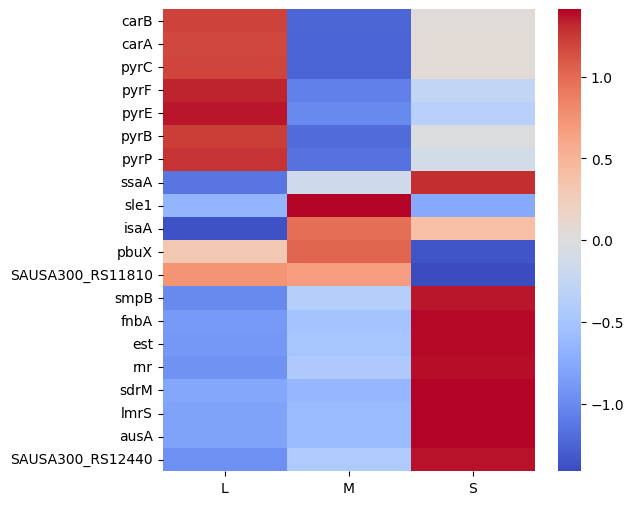

In [16]:
plt.figure(figsize=(6,6))
sns.heatmap(exp_logscaled[markers].T, cmap='coolwarm')
plt.savefig("deseq2_1234r_marker_heatmap.pdf")